In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model, preprocessing
import matplotlib.pyplot as plt
from helpers import *

In [69]:
hd = pd.read_csv("~\\OneDrive\\Documents\\GitHub\\machine-learning-applied-examples\\datasets\\processedcleveland.csv")

In [ ]:
hd["num"] = hd["num"].apply(lambda x: 1 if x > 0 else 0)
hd_categorical = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
hd_quantitative = hd.columns.difference(hd_categorical + ["num"])
hd[hd_categorical] = hd[hd_categorical].astype("int")

In [71]:
if hd.duplicated().any():
    hd = hd.drop_duplicates()
hd.duplicated().any()

False

## Data Visualization

In [72]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    int32  
 2   cp        297 non-null    int32  
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    int32  
 6   restecg   297 non-null    int32  
 7   thalach   297 non-null    float64
 8   exang     297 non-null    int32  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int32  
 11  ca        297 non-null    float64
 12  thal      297 non-null    int32  
 13  num       297 non-null    int64  
dtypes: float64(6), int32(7), int64(1)
memory usage: 24.5 KB


[Text(0, 0, 'nan'),
 Text(1, 0, '-0.09'),
 Text(2, 0, '0.11'),
 Text(3, 0, '0.29'),
 Text(4, 0, '0.20'),
 Text(5, 0, '0.13'),
 Text(6, 0, '0.15'),
 Text(7, 0, '-0.39'),
 Text(8, 0, '0.10'),
 Text(9, 0, '0.20'),
 Text(10, 0, '0.16'),
 Text(11, 0, '0.36'),
 Text(12, 0, '0.13'),
 Text(13, 0, '0.23'),
 Text(0, 1, '-0.09'),
 Text(1, 1, 'nan'),
 Text(2, 1, '0.01'),
 Text(3, 1, '-0.07'),
 Text(4, 1, '-0.20'),
 Text(5, 1, '0.04'),
 Text(6, 1, '0.03'),
 Text(7, 1, '-0.06'),
 Text(8, 1, '0.14'),
 Text(9, 1, '0.11'),
 Text(10, 1, '0.03'),
 Text(11, 1, '0.09'),
 Text(12, 1, '0.38'),
 Text(13, 1, '0.28'),
 Text(0, 2, '0.11'),
 Text(1, 2, '0.01'),
 Text(2, 2, 'nan'),
 Text(3, 2, '-0.04'),
 Text(4, 2, '0.07'),
 Text(5, 2, '-0.06'),
 Text(6, 2, '0.06'),
 Text(7, 2, '-0.34'),
 Text(8, 2, '0.38'),
 Text(9, 2, '0.20'),
 Text(10, 2, '0.15'),
 Text(11, 2, '0.24'),
 Text(12, 2, '0.27'),
 Text(13, 2, '0.41'),
 Text(0, 3, '0.29'),
 Text(1, 3, '-0.07'),
 Text(2, 3, '-0.04'),
 Text(3, 3, 'nan'),
 Text(4, 3, '0.

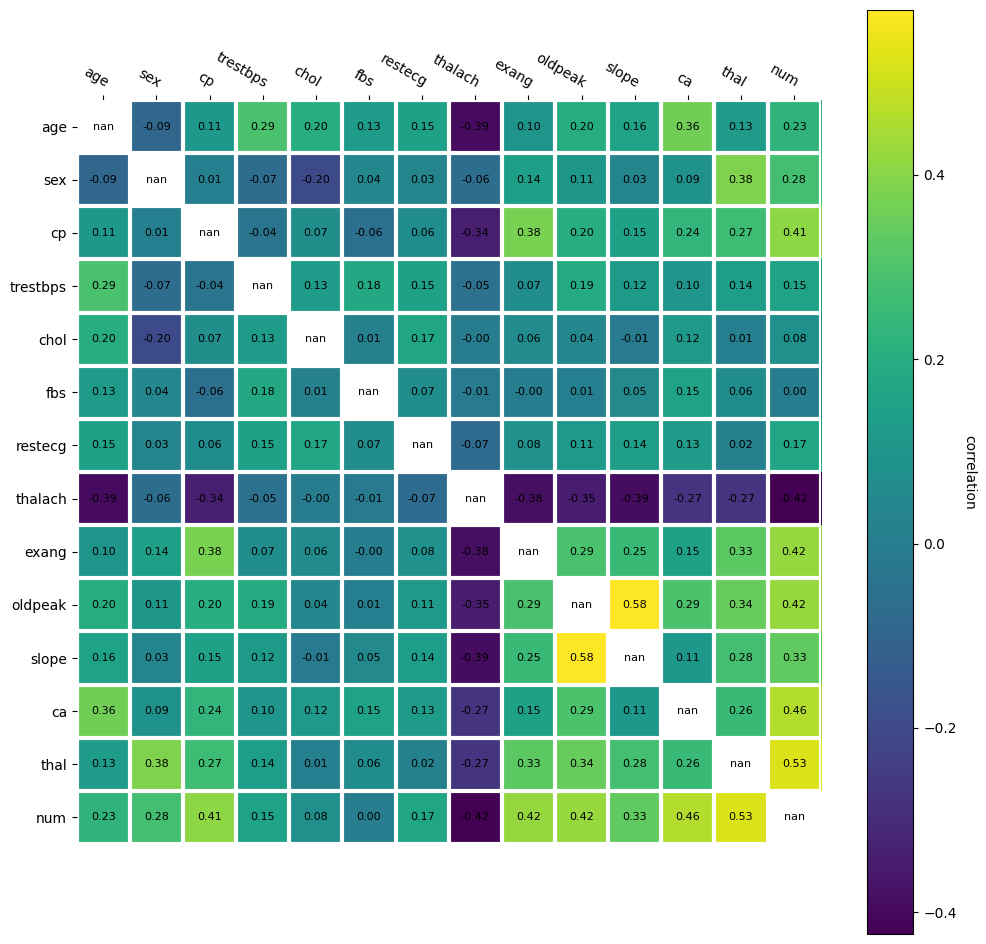

In [92]:
fig, ax = plt.subplots(figsize=(12, 12))
corr = hd.corr().to_numpy()
np.fill_diagonal(corr, np.nan)
im, cbar = heatmap(corr, row_labels=hd.columns, col_labels=hd.columns, ax=ax, cmap="viridis", cbarlabel="correlation")
annotate_heatmap(im, data=corr, valfmt="{x:.2f}", fontsize=8)

In [84]:
# Split into test/train values and scale

hd_train, hd_test = train_test_split(hd, test_size=0.2, random_state=42)
scaler = preprocessing.StandardScaler().fit(hd_train[hd_quantitative])

hd_train_x = hd_train.drop("num", axis=1)
hd_train_y = hd_train["num"]
hd_test_x = hd_test.drop("num", axis=1)
hd_test_y = hd_test["num"]

hd_test_x.head()

hd_train_x[hd_quantitative] = scaler.transform(hd_train_x[hd_quantitative])
hd_test_x[hd_quantitative] = scaler.transform(hd_test_x[hd_quantitative])

In [85]:
clf = linear_model.LogisticRegression(max_iter=10000)
clf.fit(hd_train_x, hd_train_y)
print(clf.score(hd_test_x, hd_test_y))

0.8833333333333333


In [ ]:
#@TODO: GridSearchCV
#@TODO: Confusion Matrix
#@TODO: ROC Curve idfk what that is but copilot says so
#@TODO: Precision/Recall/F1
#@TODO: Feature Importance || this is the one I'm most interested in